In [1]:
import os
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
from collections import Counter

In [88]:
# importing useful libs on the go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
import math
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import collections
from sklearn.grid_search import GridSearchCV

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value. 
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
                plt.text(j,i, "%.2f"%arrayA[i,j], ha='center', va='bottom',color='w')

def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))
    
def gt_matrix(feats,sz=16):
    a = []
    for i,c1 in enumerate(feats):
        b = [] 
        for j,c2 in enumerate(feats):
            mask = (~train[c1].isnull()) & (~train[c2].isnull())
            if i>=j:
                b.append((train.loc[mask,c1].values>=train.loc[mask,c2].values).mean())
            else:
                b.append((train.loc[mask,c1].values>train.loc[mask,c2].values).mean())

        a.append(b)

    plt.figure(figsize = (sz,sz))
    plt.imshow(a, interpolation = 'None')
    _ = plt.xticks(range(len(feats)),feats,rotation = 90)
    _ = plt.yticks(range(len(feats)),feats,rotation = 0)
    autolabel(a)

In [3]:
def hist_it1(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5,color='r')
    feat[Y==1].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    plt.ylim((0,1))

In [4]:
def hist_it2(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5,color='r')
    plt.ylim((0,1))

In [5]:
def hist_it3(feat):
    plt.figure(figsize=(16,4))
    feat[Y==1].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    plt.ylim((0,1))

In [6]:
train = pd.read_csv('train_mod.csv')
Y = train.target

In [5]:
train.shape

(348978, 46)

In [7]:
test = pd.read_csv('test_mod.csv')

In [7]:
test.shape

(523466, 45)

In [8]:
test_ID = test.transaction_id

In [9]:
train.head()

transaction_id     num_var_1  num_var_2  num_var_3     num_var_4  \
0          id_11  2.302632e-08   0.040182        0.0  1.800000e-07   
1          id_33  7.965789e-06   0.157872        0.0  2.105000e-06   
2          id_51  7.828947e-08   0.089140        0.0  3.550000e-07   
3          id_54  7.894737e-08   0.227239        0.0  1.050000e-06   
4          id_62  3.321053e-06   0.160410        0.0  2.105000e-06   

      num_var_5     num_var_6     num_var_7 cat_var_1 cat_var_2      ...       \
0  2.302632e-08  2.368421e-08  1.115205e-08       NaN        ce      ...        
1  2.769737e-07  7.965789e-06  2.433058e-06        da        tn      ...        
2  4.671053e-08  1.052632e-07  4.276014e-07        gf        ce      ...        
3  1.381579e-07  2.190789e-07  1.848054e-08       NaN        ce      ...        
4  2.769737e-07  3.340789e-06  2.152983e-06        da        tn      ...        

  cat_var_30 cat_var_32 cat_var_33 cat_var_34 cat_var_39 cat_var_41 target  \
0          0          0          0          0          0          0      0   
1          0          0          0          0          0          0      0   
2          0          0          0          0          0          0      0   
3          0          0          0          0          0          0      0   
4          0          0          0          0          0          0      0   

  cat_1_is_null cat_3_is_null cat_8_is_null  
0             1             0             1  
1             0             0             1  
2             0             0             0  
3             1             0             0  
4             0             0             1  

[5 rows x 46 columns]

In [9]:
train.drop('transaction_id',axis=1,inplace=True)

In [10]:
test.drop('transaction_id',axis=1,inplace=True)

In [11]:
cat_cols = list(train.select_dtypes(include=['object']).columns)
num_cols = list(train.select_dtypes(exclude=['object']).columns)

In [12]:
cat1 = cat_cols

In [13]:
cat2 = ['cat_var_19',
 'cat_var_21',
 'cat_var_22',
 'cat_var_23',
 'cat_var_24',
 'cat_var_25',
 'cat_var_26',
 'cat_var_27',
 'cat_var_28',
 'cat_var_29',
 'cat_var_30',
 'cat_var_32',
 'cat_var_33',
 'cat_var_34',
 'cat_var_39',
 'cat_var_41','cat_1_is_null',
 'cat_3_is_null',
 'cat_8_is_null']

In [14]:
num = ['num_var_1',
 'num_var_2',
 'num_var_3',
 'num_var_4',
 'num_var_5',
 'num_var_6',
 'num_var_7']

In [26]:
for cat in cat1:
    print train[cat].value_counts()

gf    132170
da    100964
pu     20069
ye      6303
ex      3236
on      3121
ln      2915
og      2206
to      2089
nk      2025
tl      1863
qk      1641
yv      1182
zl      1180
pv      1164
xf      1132
nm       947
tq       881
ap       859
pt       845
jp       815
by       809
fx       756
hn       726
mx       700
nj       643
ua       618
qt       601
ka       558
qh       554
       ...  
ao        10
mf        10
pe        10
eh        10
bg        10
bo        10
ms         9
tt         9
kh         9
rv         9
qa         9
bc         9
in         9
sx         9
dj         9
oh         8
rc         8
at         7
mh         7
ea         7
xn         6
py         6
ed         5
tr         5
cc         5
zu         4
ev         4
zp         4
hk         3
or         2
Name: cat_var_1, Length: 534, dtype: int64
ce    233079
tn    103034
ji      6570
ep      2426
ex      1056
rv       548
yv       431
hr       413
no       299
iq       189
ln       176
ts       101
hm      

In [15]:
train.fillna('NaN',inplace=True)

In [16]:
test.fillna('NaN',inplace=True)

In [17]:
cat_var_1_uni = train['cat_var_1'].unique()

In [18]:
l = []
for cat in cat1:
    for i in train[cat].unique():
        if i in cat_var_1_uni:
            continue
        l.append(i)


In [19]:
for i in cat_var_1_uni:
    l.append(i)

In [20]:
len(l)

627

In [21]:
dic = dict(zip(l,range(1,628)))

In [22]:
dic['NaN'] = -999

In [23]:
for cat in cat1:
    train[cat] = train[cat].map(dic).astype(int)

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Create a copy to work with
X = train.copy()

# Save and drop labels
y = train.target
X = X.drop('target', axis=1)

# fill NANs 
X = X.fillna(-999)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [80]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [82]:
rf.feature_importances_

array([  8.93071639e-02,   5.43638968e-02,   8.67175029e-06,
         8.95686866e-02,   2.27227713e-02,   6.61706403e-02,
         1.60890879e-01,   3.35021768e-02,   1.93838802e-02,
         9.58634587e-02,   1.44460624e-02,   1.71786419e-02,
         8.67947595e-02,   2.48783978e-03,   2.96529486e-02,
         2.01331884e-02,   3.08298927e-02,   1.49076221e-02,
         8.91562908e-03,   2.78055496e-02,   4.51505266e-02,
         2.14023023e-02,   5.37598727e-03,   1.12689655e-02,
         8.47973914e-03,   9.87119084e-03,   1.44898382e-03,
         7.23743976e-04,   4.49315188e-04,   3.12729988e-03,
         1.22334263e-04,   1.82143035e-03,   0.00000000e+00,
         1.72066812e-05,   4.31029437e-05,   1.66194829e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.50530576e-05,   0.00000000e+00,   4.61807412e-04,
         4.36475640e-03,   7.55700212e-04])

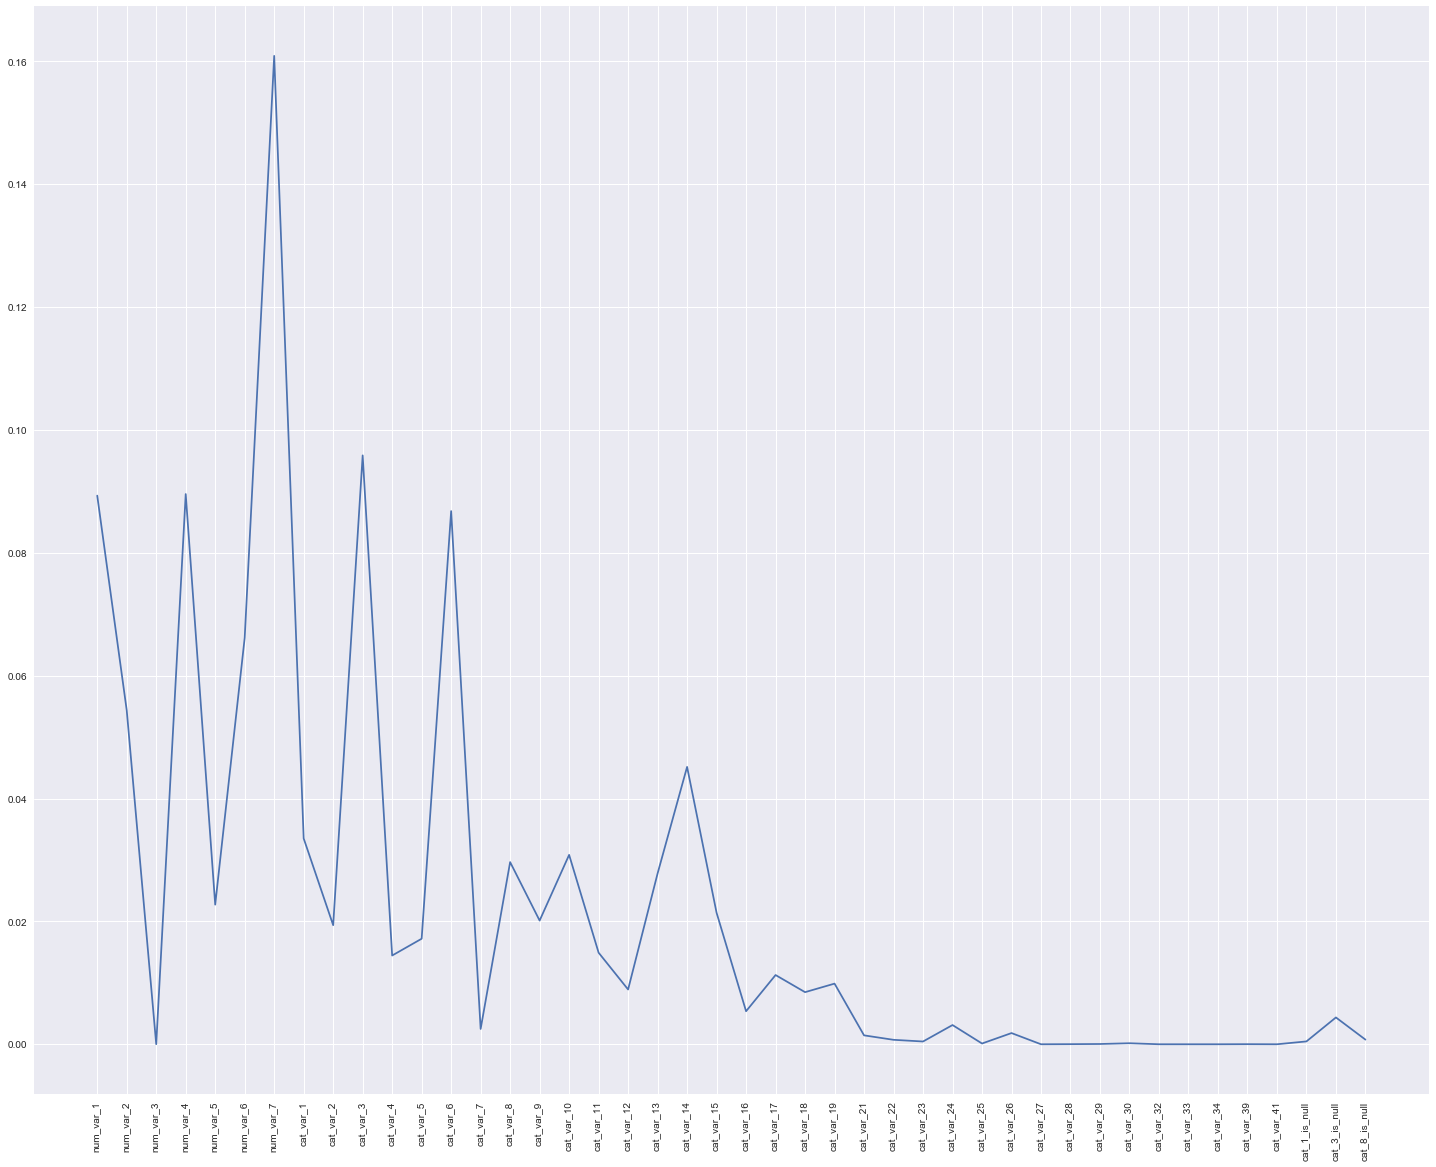

In [81]:
plt.figure(figsize=(25,20))
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

In [24]:
for cat in cat1:
    test[cat] = test[cat].map(dic).astype(int)

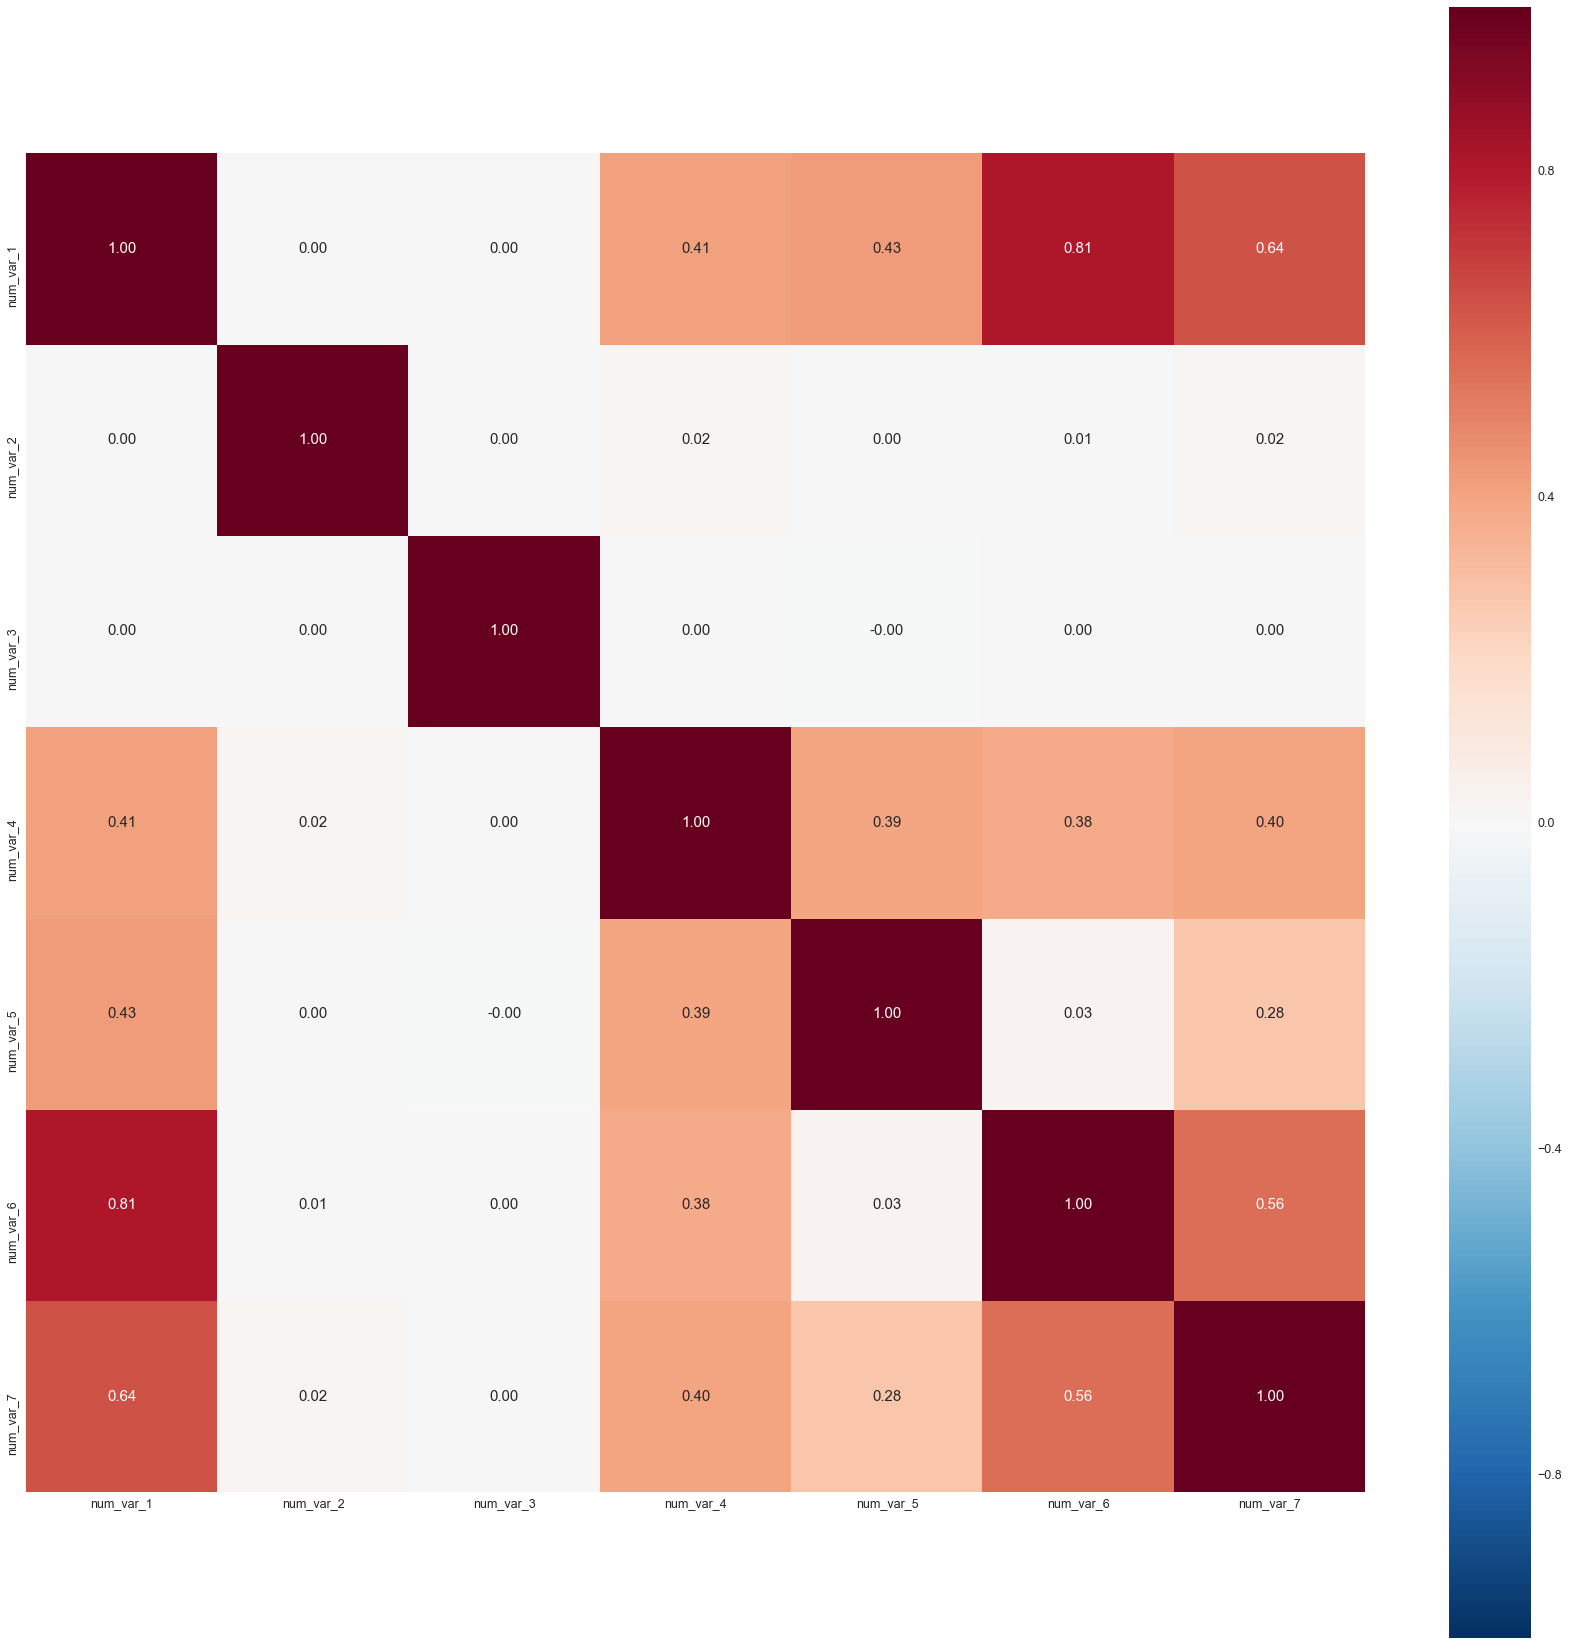

In [38]:
cm = np.corrcoef(train[num].values.T)
sns.set(font_scale=1.25)
a4_dims = (30,30)
fig ,ax = plt.subplots(figsize=a4_dims)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',ax =ax, yticklabels=train[num].columns.values, xticklabels=train[num].columns.values)
plt.show()

In [40]:
train[cat1].head(10)

cat_var_1  cat_var_2  cat_var_3  cat_var_4  cat_var_5  cat_var_6  \
0       -999        564        359        129        140        116   
1         94        140        101        140        129        118   
2         95        564        186        140        129        395   
3       -999        564        516        129        129        379   
4         94        140        304        140        129        118   
5         95        564        108        140        140        395   
6         96        564        108        129        129        144   
7         94        140        487        140        129        118   
8         97        564       -999        129        140        313   
9         94        140        137        140        129        118   

   cat_var_7  cat_var_8  cat_var_9  cat_var_10  cat_var_11  cat_var_12  \
0        129       -999        140         359         176         129   
1        129       -999        486         108         176         176   
2        129        483        486         116         564         140   
3        129        317        129         552         176         129   
4        129       -999        129         618         486         176   
5        129        483        140         322         140         140   
6        129         96        564         322         140         140   
7        129       -999        176         433         140         176   
8        129        211        140         515         176         564   
9        129       -999        140         108         486         176   

   cat_var_13  cat_var_14  cat_var_15  cat_var_16  cat_var_17  cat_var_18  
0         433         359         129         140         140         129  
1         118         359         140         140         140         140  
2         486         359         129         140         140         129  
3         564         140         129         140         140         129  
4         118         359         140         140         140         140  
5         486         359         129         140         140         129  
6         359         322         129         140         129         140  
7         118         359         140         140         129         140  
8         552         129         129         129         140         140  
9         118         359         140         140         129         140

In [55]:
(train[cat1].iloc[0]).value_counts().max()

5

In [25]:
train['num_var_3'].unique()

array([ 0.        ,  0.27586207,  0.03448276,  0.72413793,  0.13793103,
        0.75862069,  0.31034483,  0.68965517])

In [26]:
l = [0,3,1,6,2,7,4,5]

In [27]:
dic = dict(zip(train['num_var_3'].unique(),l))

In [28]:
train['num_var_3'] = train['num_var_3'].map(dic)

In [29]:
test['num_var_3'] = test['num_var_3'].map(dic)

In [85]:
train[num].head()

num_var_1  num_var_2  num_var_3     num_var_4     num_var_5  \
0  2.302632e-08   0.040182          0  1.800000e-07  2.302632e-08   
1  7.965789e-06   0.157872          0  2.105000e-06  2.769737e-07   
2  7.828947e-08   0.089140          0  3.550000e-07  4.671053e-08   
3  7.894737e-08   0.227239          0  1.050000e-06  1.381579e-07   
4  3.321053e-06   0.160410          0  2.105000e-06  2.769737e-07   

      num_var_6     num_var_7  
0  2.368421e-08  1.115205e-08  
1  7.965789e-06  2.433058e-06  
2  1.052632e-07  4.276014e-07  
3  2.190789e-07  1.848054e-08  
4  3.340789e-06  2.152983e-06

(0, 0.02)

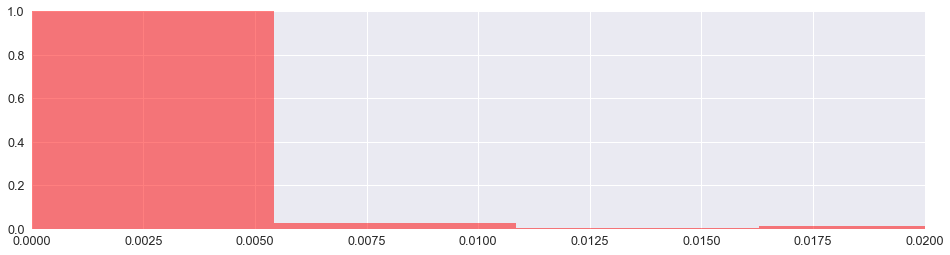

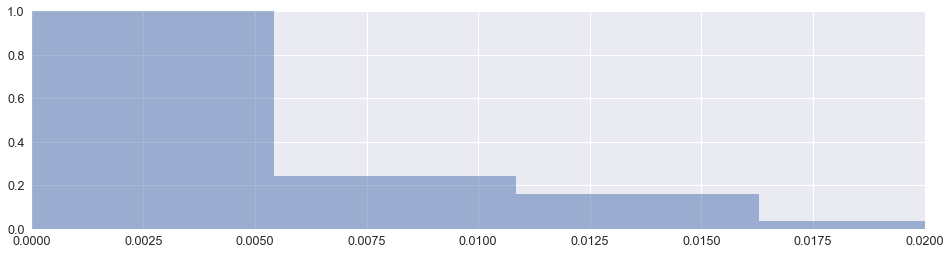

In [146]:
hist_it2(train['num_var_1'])
plt.ylim((0,1))
plt.xlim((0,.02))

hist_it3(train['num_var_1'])
plt.ylim((0,1))
plt.xlim((0,.02))

In [30]:
n1 = []
for i in train['num_var_1']:
    if i > .0050:
        n1.append(1)
    else:
        n1.append(0)

In [31]:
train['num_1_greater'] = n1

In [32]:
n1 = []
for i in test['num_var_1']:
    if i > .0050:
        n1.append(1)
    else:
        n1.append(0)

In [33]:
test['num_1_greater'] = n1

In [34]:
train.shape , test.shape

((348978, 46), (523466, 45))

(0, 1)

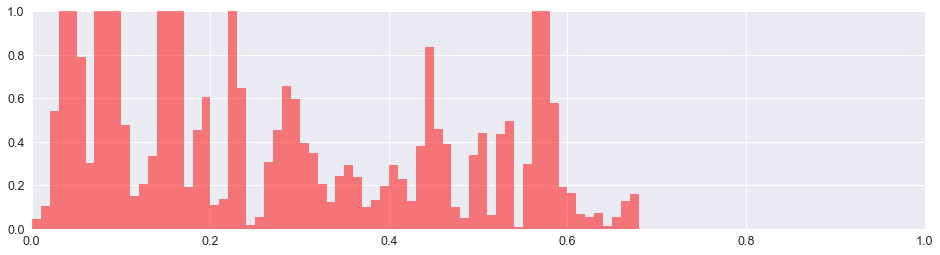

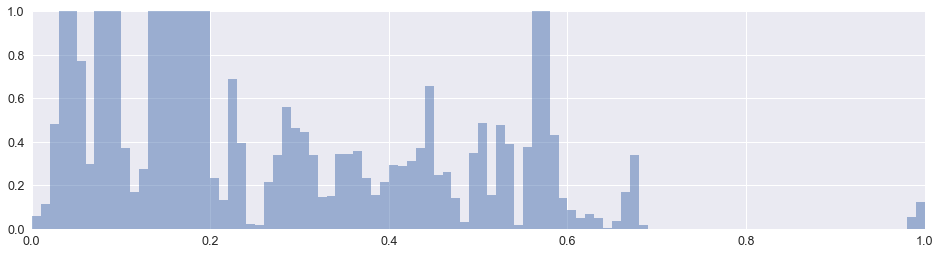

In [149]:
hist_it2(train['num_var_2'])
plt.ylim((0,1))
plt.xlim((0,1))

hist_it3(train['num_var_2'])
plt.ylim((0,1))
plt.xlim((0,1))

(0, 0.2)

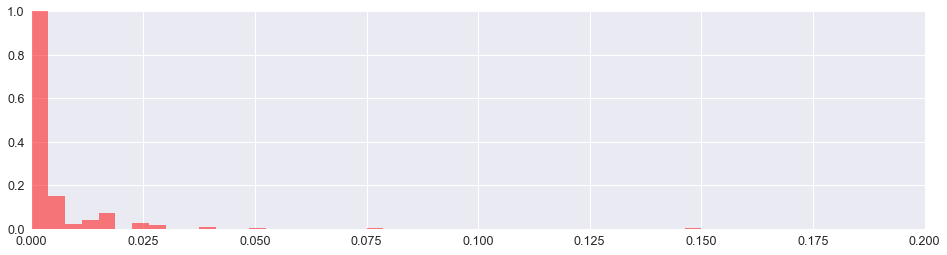

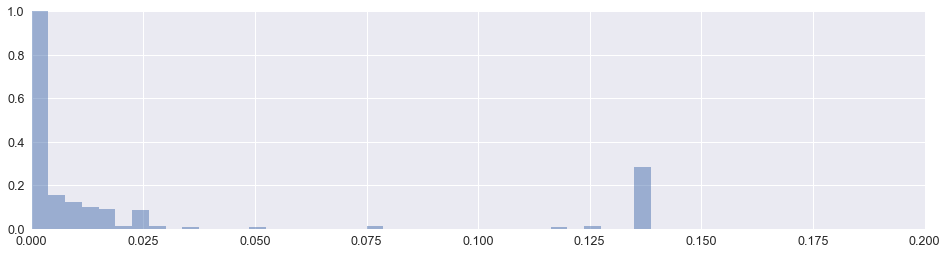

In [153]:
hist_it2(train['num_var_4'])
plt.ylim((0,1))
plt.xlim((0,.2))

hist_it3(train['num_var_4'])
plt.ylim((0,1))
plt.xlim((0,.2))

In [38]:
n4 = []
for i in train['num_var_4']:
    if i > .050:
        n4.append(1)
    else:
        n4.append(0)

In [40]:
train['num_4_greater'] = n4

In [41]:
n4 = []
for i in test['num_var_4']:
    if i > .050:
        n4.append(1)
    else:
        n4.append(0)

In [42]:
test['num_4_greater'] = n4

(0, 0.0044)

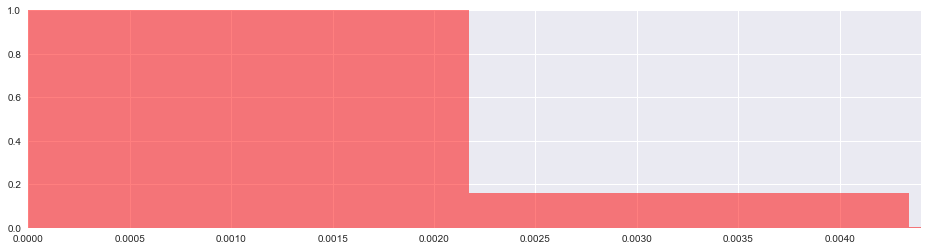

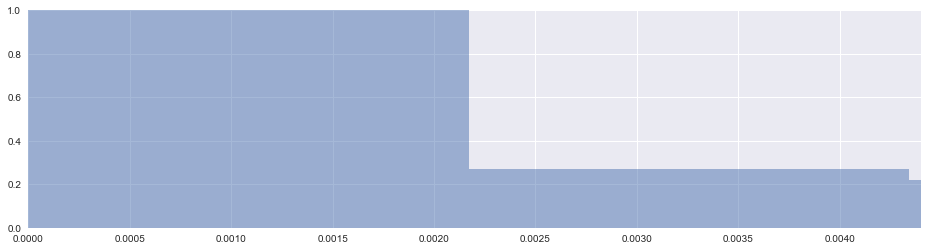

In [56]:
hist_it2(train['num_var_5'])
plt.ylim((0,1))
plt.xlim((0,.0044))

hist_it3(train['num_var_5'])
plt.ylim((0,1))
plt.xlim((0,.0044))

In [59]:
n5 = []
for i in train['num_var_5']:
    if i > .0044:
        n5.append(1)
    else:
        n5.append(0)

In [61]:
train['num_5_greater'] = n5

In [62]:
n5 = []
for i in test['num_var_5']:
    if i > .0044:
        n5.append(1)
    else:
        n5.append(0)

In [63]:
test['num_5_greater'] = n5

(0, 0.005)

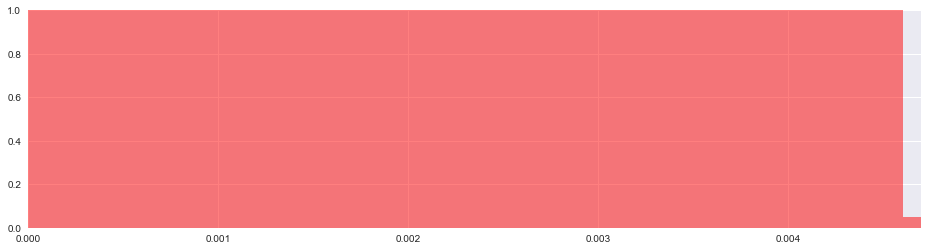

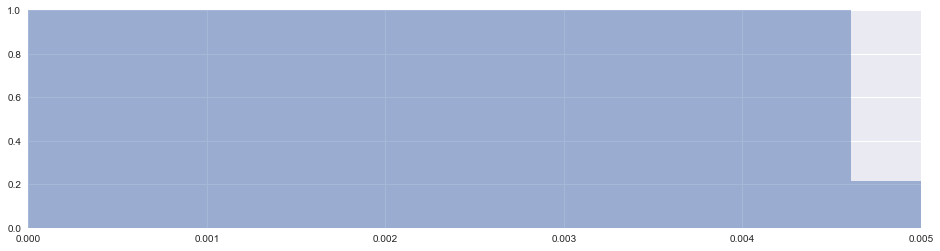

In [72]:
hist_it2(train['num_var_6'])
plt.ylim((0,1))
plt.xlim((0,.0047))

hist_it3(train['num_var_6'])
plt.ylim((0,1))
plt.xlim((0,.005))

In [75]:
n6 = []
for i in train['num_var_6']:
    if i > .0047:
        n6.append(1)
    else:
        n6.append(0)

In [76]:
train['num_6_greater'] = n6

In [77]:
n6 = []
for i in test['num_var_6']:
    if i > .0047:
        n6.append(1)
    else:
        n6.append(0)

In [78]:
test['num_6_greater'] = n6

(0, 0.01)

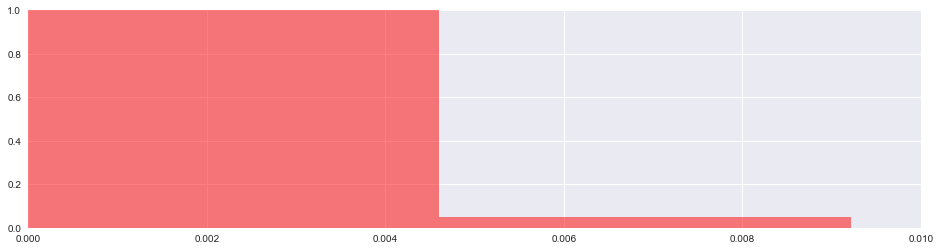

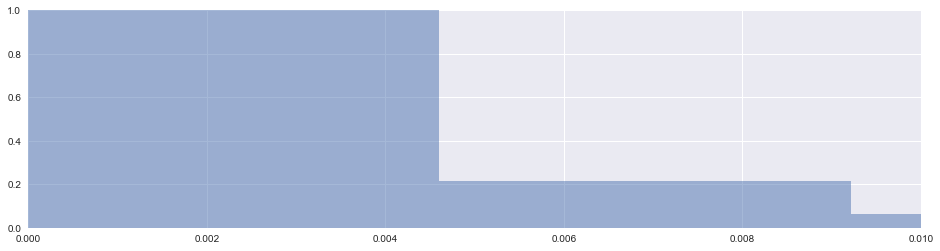

In [82]:
hist_it2(train['num_var_6'])
plt.ylim((0,1))
plt.xlim((0,.01))

hist_it3(train['num_var_6'])
plt.ylim((0,1))
plt.xlim((0,.01))

In [83]:
n7 = []
for i in train['num_var_7']:
    if i > .0047:
        n7.append(1)
    else:
        n7.append(0)

In [84]:
train['num_7_greater'] = n7

In [85]:
n7 = []
for i in test['num_var_7']:
    if i > .0047:
        n7.append(1)
    else:
        n7.append(0)

In [86]:
test['num_7_greater'] = n7

In [87]:
train.shape , test.shape

((348978, 50), (523466, 49))

In [111]:
X = train.drop('target',axis=1)
y = train['target']

In [112]:
from sklearn.model_selection import StratifiedKFold

In [143]:
skf = StratifiedKFold(n_splits=5, random_state=43)


In [114]:
xgb_model = xgb.XGBClassifier()

In [169]:
X_tr , X_te , y_tr , y_te = train_test_split(X,y,test_size=0.5)

In [172]:
para ={
    'colsample_bytree': 0.8,
    'learning_rate': 0.05,
    'max_depth': 25,
    'min_child_weight': 3,
    'n_estimators': 200,
    'n_jobs': -1,
    'objective': 'binary:logistic',
    'seed': 1337,
    'silent': 0,
    'subsample': 0.8,
    'eval_metric' : 'auc' 
    }



In [173]:
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dtest = xgb.DMatrix(X_te)
bst = xgb.train(para, dtrain,n_rounds)
pred = (bst.predict(dtest) > .35).astype('int')
print roc_auc_score(y_te, pred)

0.709849033131


In [174]:
train2 = X_te.copy()

In [175]:
train2['xgb'] = pred

In [116]:
n_rounds=15

In [117]:
from sklearn.metrics import roc_auc_score

In [145]:
for train_index, test_index in skf.split(X, y):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)
    bst = xgb.train(para, dtrain,n_rounds)
    pred = (bst.predict(dtest) > .35).astype('int')
    print roc_auc_score(y_test, pred)
    

0.714311011762
0.712761481225
0.714302739876
0.712885089187
0.707271970951


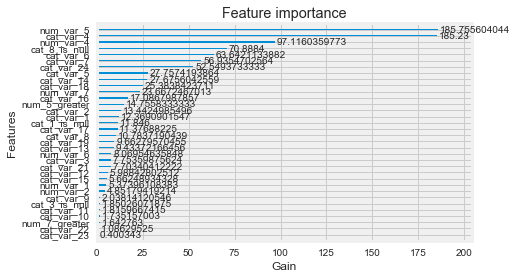

In [160]:
 xgb.plot_importance(bst, importance_type='gain', xlabel='Gain')

Counter({0: 65436, 1: 4360})

In [163]:
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(test)
bst = xgb.train(para, dtrain,n_rounds)
pred = (bst.predict(dtest) > .35).astype('int')


ValueError: Found input variables with inconsistent numbers of samples: [348978, 523466]

In [164]:
Counter(pred)

Counter({0: 489358, 1: 34108})

In [165]:
ans = test.copy()

In [166]:
ans['transaction_id'] = test_ID
ans['target'] = pred

In [167]:
ans =ans[['transaction_id','target']]

In [168]:
ans.to_csv('submit.csv',index=False)